In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from timeit import default_timer as timer

In [2]:
# data clean
df = pd.read_csv('listings.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,2019-07-14,0.39,2,288
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,2019-07-26,4.64,1,212
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,2019-07-21,0.60,1,127


In [4]:
# id, host_name are just labels, do not mean anything,we can safely drop them. Also drop last_review
df.drop(['id','host_name','last_review'],axis=1,inplace=True)

In [5]:
df.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10131
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# Many 'Reviews_per_month' are null, this is because the 'number of reviews' columns are zero, then we can safetly assign the NaN value to be zero
df.reviews_per_month.fillna(0,inplace=True)

EDA

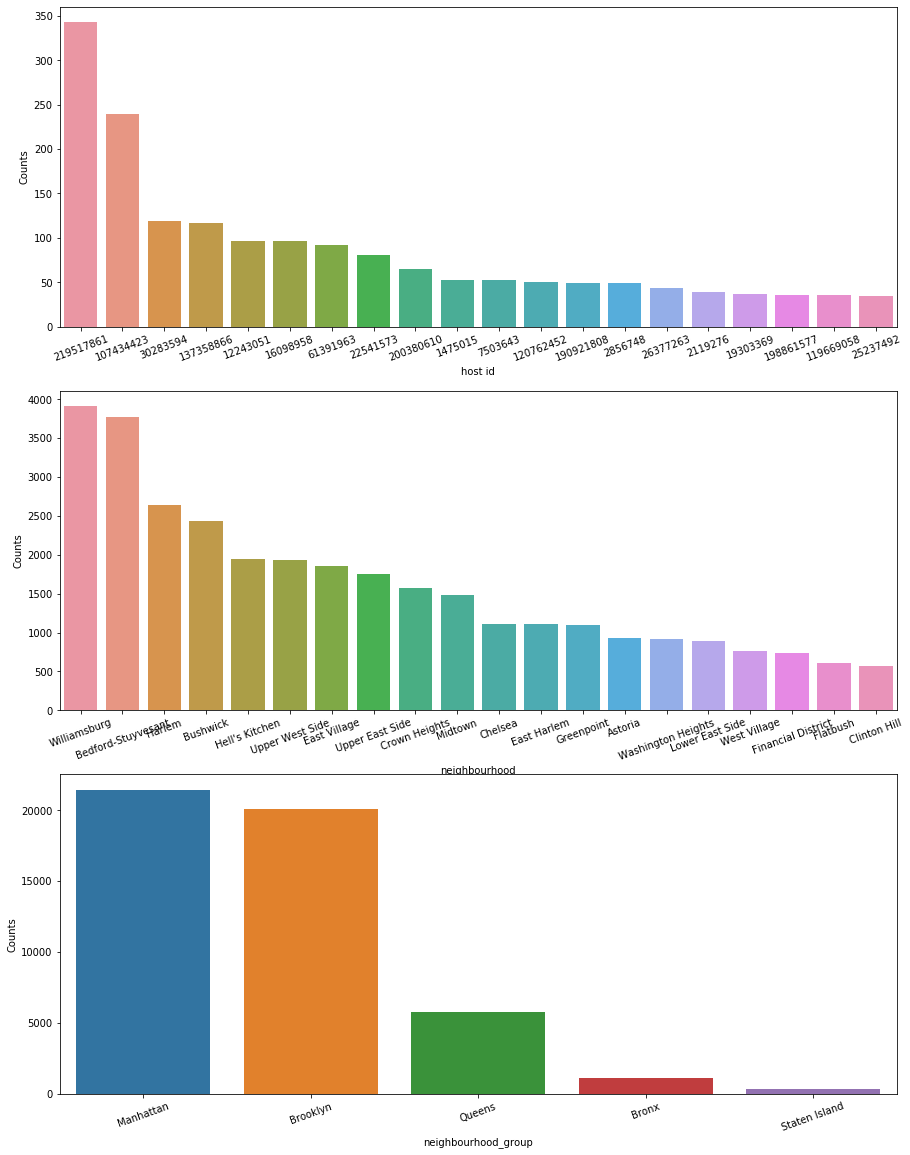

In [7]:
plt.figure(1,figsize=(15,20))
plt.subplot(311)
 # host id counts
host_id_top10 = df.host_id.value_counts().head(20)
ax = sns.barplot(host_id_top10.index, host_id_top10.values,order=host_id_top10.index)
plt.xlabel('host id')
plt.xticks(rotation=20)
plt.ylabel('Counts')


#neighhood count
plt.subplot(312)
n_top10 = df.neighbourhood.value_counts().head(20)
ax = sns.barplot(n_top10.index, n_top10.values,order=n_top10.index)
plt.xlabel('neighbourhood')
plt.xticks(rotation=20)
plt.ylabel('Counts')


 #neighhood group count
plt.subplot(313)

ngroup_top10 = df.neighbourhood_group.value_counts().head(10)
ax = sns.barplot(ngroup_top10.index, ngroup_top10.values,order=ngroup_top10.index)
plt.xlabel('neighbourhood_group')
plt.xticks(rotation=20)
plt.ylabel('Counts')
plt.show()

We can see the in the neighbourhood_group plot, the stays concentrate on a Manhattan and Brooklyn, these two almost take 80% of the Airebnb stays. In the host id plot, a few hosts are very popular

In [8]:
#Let's take a look at the host_id with most stays.
df[df.host_id==219517861]
# Seems it's just because it has more room/apartment to rent, so in total the number is large. 

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
37404,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,0.00,343,308
37405,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,240,29,1,0.43,343,248
37658,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,0.38,343,188
38769,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,289,2,10,1.90,343,286
38770,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,262,2,16,2.51,343,277
38771,Sonder | The Nash | Brilliant Studio + Rooftop,219517861,Manhattan,Murray Hill,40.74845,-73.97446,Entire home/apt,245,2,5,0.96,343,314
38772,Sonder | 11th Ave | Bright 1BR + Gym,219517861,Manhattan,Hell's Kitchen,40.76188,-73.99616,Entire home/apt,197,29,1,0.63,343,310
38773,Sonder | 11th Ave | Contemporary 1BR + Gym,219517861,Manhattan,Hell's Kitchen,40.76037,-73.99744,Entire home/apt,197,29,2,1.02,343,361
38774,Sonder | The Nash | Pristine Studio + Gym,219517861,Manhattan,Murray Hill,40.74884,-73.97589,Entire home/apt,272,2,7,1.02,343,331
38775,Sunny 1BR in Hell's Kitchen by Sonder,219517861,Manhattan,Hell's Kitchen,40.76079,-73.99807,Entire home/apt,189,29,1,0.49,343,323


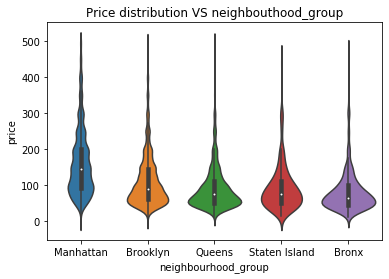

In [9]:
# price distribution at different ngroup
plt.figure(2)
ax = sns.violinplot(data=df[df.price <500],x='neighbourhood_group',y='price')
ax.set_title('Price distribution VS neighbouthood_group')
plt.show()

We plot the price distribution at different n_groups below 500 dollors. Brooklyn/Queens/Staten Island/Bronx have close price distribution. Most of the rents are below 100 dollars. However, In Manhattan, the price fall above 100 way more than the other four, 

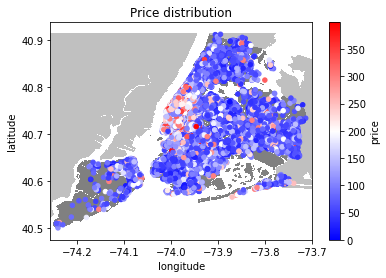

In [10]:
# heat map
import urllib
plt.figure(3)
i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
NYC_image = plt.imread(i)
plt.imshow(NYC_image,extent=[-74.257159, -73.699215, 40.495992,40.915568])
ax = plt.gca()
df[df.price <400].plot(kind='scatter',x='longitude', y='latitude',c='price',cmap='bwr',ax=ax)
plt.title('Price distribution')
plt.show()

From this heatmap, it is more clear showning the price distribution

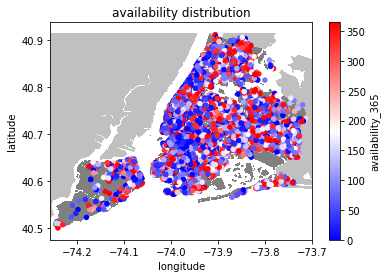

In [11]:
plt.figure(4)
i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
NYC_image = plt.imread(i)
plt.imshow(NYC_image,extent=[-74.257159, -73.699215, 40.495992,40.915568])
ax = plt.gca()
df.plot(kind='scatter',x='longitude', y='latitude',c='availability_365',cmap='bwr',ax=ax)
plt.title('availability distribution')
plt.show()

Looks that the availability and price are correlated, lower availablility corresponds to high price. We can see that clearer in the
correlation plot later

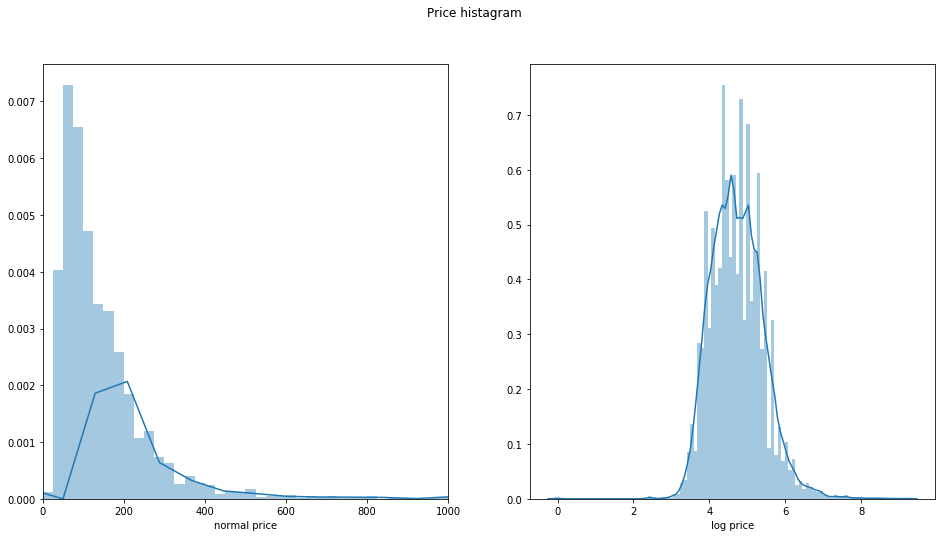

In [12]:
plt.figure(5,figsize=(16,8))

plt.subplot(121)
sns.distplot(df.price,bins=400)
plt.xlim(0,1000)
plt.xlabel('normal price')
plt.subplot(122)
sns.distplot(np.log1p(df.price), bins=100)
plt.xlabel('log price')
plt.suptitle('Price histagram')
plt.show()

The orginal price distribution is skewed a lot, thus we transformed it to be log price. (Not necessary, but 1. can make the cost functoion miniminze better, the error of the predictions 2. make the algorithm converge properly and faster)
                               

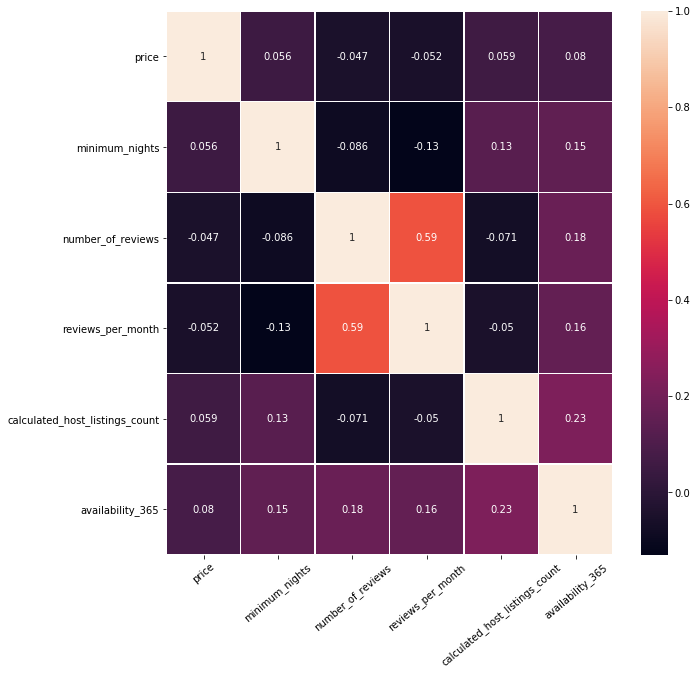

In [13]:
# plot correlation
df_drop = df.drop(['name','host_id','latitude','longitude'],axis=1)
corr = df_drop.corr()
plt.figure(6,figsize=(10,10))
sns.heatmap(corr,linewidths=0.5,annot=True)
plt.xticks(rotation=40)
plt.show()

Here we further drop 'name','host_id','latitude','longitude' columns as well, since name and host_id are just representations of the house, does not carry other information. Also latitude and longitude, since neighbourhood already reflects the location. From the correlation plot, we do see availativlity has the highest correlation with price

##################################### 
#Machine learning

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [24]:
#encoding categorical features and scaler num values
categorical_feature = df_drop.select_dtypes(include=['object'])
numer_feature = df_drop.select_dtypes(exclude=['object']).drop('price',axis=1)

In [25]:
cate_feature_dummy = pd.get_dummies(categorical_feature)
std = preprocessing.StandardScaler()
numer_feature_std = std.fit_transform(numer_feature)
numer_feature_std_df = pd.DataFrame(numer_feature_std,columns=list(numer_feature.columns))

df_new_features = pd.concat([cate_feature_dummy,numer_feature_std_df],axis=1)
target = pd.DataFrame(np.log1p(df.price),columns=['price'])

In [26]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(df_new_features,target,random_state=42, test_size=0.2)

In [27]:
# model import
from sklearn.linear_model import Ridge,Lasso, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [28]:
# try a rough fit, cross val on LinearRegression, Ridge , Lasso, DT, RF with default parameters
Linear_Reg = LinearRegression()
Rid_Reg = Ridge()
Lasso_Reg = Lasso()
DT_Reg = DecisionTreeRegressor()
RF_Reg = RandomForestRegressor()


Linear_Reg_score = -cross_val_score(Linear_Reg,X_train,y_train,scoring='neg_mean_squared_error',cv=KFold(5,shuffle=True, random_state=0))
print('Linear_Reg_score:',Linear_Reg_score.mean(),'+/-',Linear_Reg_score.std())
Rid_Reg_score = -cross_val_score(Rid_Reg,X_train,y_train,scoring='neg_mean_squared_error',cv=KFold(5,shuffle=True, random_state=0))
print('Rid_Reg:', Rid_Reg_score.mean(),'+/-',Rid_Reg_score.std())
Lasso_Reg_score = -cross_val_score(Lasso_Reg,X_train,y_train,scoring='neg_mean_squared_error',cv=KFold(5,shuffle=True, random_state=0))
print('Lasso_Reg_score:',Lasso_Reg_score.mean(),'+/-',Lasso_Reg_score.std())
DT_Reg_score = -cross_val_score(DT_Reg,X_train,y_train,scoring='neg_mean_squared_error',cv=KFold(5,shuffle=True, random_state=0))
print('DT_Reg_score:',DT_Reg_score.mean(),'+/-',DT_Reg_score.std())
RF_Reg_score = -cross_val_score(RF_Reg,X_train,np.ravel(y_train),scoring='neg_mean_squared_error',cv=KFold(5,shuffle=True, random_state=0))
print('RF_Reg_score:',RF_Reg_score.mean(),'+/-',RF_Reg_score.std())


Linear_Reg_score: 8.373222092980863e+18 +/- 1.5599176516896406e+19
Rid_Reg: 0.2261211978069481 +/- 0.007875539302730338
Lasso_Reg_score: 0.48107453465560235 +/- 0.008113418118860792
DT_Reg_score: 0.3628083941518382 +/- 0.013309978593840633
RF_Reg_score: 0.22942938019568454 +/- 0.008082411315568902


Parameter tunning

Ridge best parameter: {'alpha': 5}


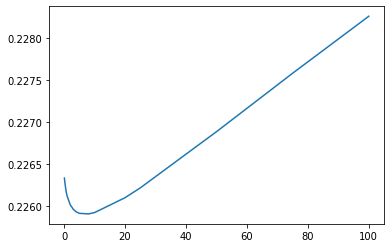

Ridge best mean squred error: 0.21656963368774163
Ridge best r2: 0.539421563754531


In [67]:
# Ridge
alpha_list = [0.1,0.2,0.6,0.8,1,2,3,4,5,8,10,20,25,50,75,100]
Rid_reg_Grid = GridSearchCV(Rid_Reg,param_grid={'alpha':alpha_list},cv=5,return_train_score=True,scoring= 'neg_mean_squared_error')
Rid_reg_Grid.fit(X_train,y_train)
print('Ridge best parameter:',Rid_reg_Grid.best_params_)

Rid_scores = []
for a in alpha_list:
    Rid_scores.append(-cross_val_score(Ridge(alpha=a),X_train,y_train,scoring='neg_mean_squared_error',cv=KFold(5,shuffle=True, random_state=0)).mean())
#print(Rid_scores)
plt.plot(alpha_list,Rid_scores)
plt.show()

Rid_reg_best_error = mean_squared_error(y_test,Rid_reg_Grid.best_estimator_.predict(X_test))
Rid_reg_best_r2 = r2_score(y_test,Rid_reg_Grid.best_estimator_.predict(X_test))
print('Ridge best mean squred error:',Rid_reg_best_error)
print('Ridge best r2:',Rid_reg_best_r2)

Lasso best parameter: {'alpha': 0.0001}


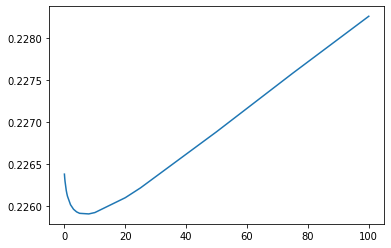

Lasso best mean squred error: 0.21683587495274675
Lasso best r2: 0.5388553487066869


In [69]:
# Lasso
alpha_list2 = [0.0001,0.001,0.01,0.1,0.2,0.6,0.8,1,2,3,4,5,8,10,20,25,50,75,100]
Lasso_reg_Grid = GridSearchCV(Lasso_Reg,param_grid={'alpha':alpha_list2},cv=5,return_train_score=True,scoring= 'neg_mean_squared_error')
Lasso_reg_Grid.fit(X_train,y_train)
print('Lasso best parameter:',Lasso_reg_Grid.best_params_)

Lasso_scores = []
for a in alpha_list2:
    Lasso_scores.append(-cross_val_score(Ridge(alpha=a),X_train,y_train,scoring='neg_mean_squared_error',cv=KFold(5,shuffle=True, random_state=0)).mean())
#print(Lasso_scores)
plt.plot(alpha_list2,Lasso_scores)
plt.show()

Lasso_reg_best_error = mean_squared_error(y_test,Lasso_reg_Grid.best_estimator_.predict(X_test))
Lasso_reg_best_r2 = r2_score(y_test,Lasso_reg_Grid.best_estimator_.predict(X_test))
print('Lasso best mean squred error:',Lasso_reg_best_error)
print('Lasso best r2:',Lasso_reg_best_r2)

In [29]:
#XGBoost
lr = [0.005, 0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5]
XGB_score_lr = []
for a in lr:
    XGB_score_lr.append((-cross_val_score(XGBRegressor(learning_rate=a,objective ='reg:squarederror'),X_train,y_train,scoring='neg_mean_squared_error',cv=KFold(5,shuffle=True, random_state=0))).mean())



max_dep = [1,2,3,5,7,9,11]
XGB_score_depth = []
for b in max_dep:
    XGB_score_depth.append((-cross_val_score(XGBRegressor(max_depth=b,objective ='reg:squarederror'),X_train,y_train,scoring='neg_mean_squared_error',cv=KFold(5,shuffle=True, random_state=0))).mean())

    
min_chil_weights = [1,3,5,7]

XGB_score_min_weights = []
for c in min_chil_weights:
    XGB_score_min_weights.append((-cross_val_score(XGBRegressor(min_child_weight=c,objective ='reg:squarederror'),X_train,y_train,scoring='neg_mean_squared_error',cv=KFold(5,shuffle=True, random_state=0))).mean())

KeyboardInterrupt: 

In [86]:
print('XGBoost learning rate best mean squared error:',min(XGB_score_lr))
print('XGBoost best learning rate:',lr[np.argmin(XGB_score_lr)])
print('XGBoost max depth best mean squared error:',min(XGB_score_depth))
print('XGBoost best max depth:',max_dep[np.argmin(XGB_score_depth)])
print('XGBoost min child weight best mean squared error:',min(XGB_score_min_weights))
print('XGBoost best min child weight:',min_chil_weights[np.argmin(XGB_score_min_weights)])

XGBoost learning rate best mean squared error: 0.2023427303979851
XGBoost best learning rate: 0.4
XGBoost max depth best mean squared error: 0.19929006170711872
XGBoost best max depth: 9
XGBoost min child weight best mean squared error: 0.21264426528194483
XGBoost best min child weight: 5


In [30]:
XGB_reg = XGBRegressor(objective ='reg:squarederror',max_depth=9, learning_rate=0.4, min_child_weight=5)
XGB_reg.fit(X_train,y_train)

XGB_reg_best_error = mean_squared_error(y_test,XGB_reg.predict(X_test))
XGB_reg_r2_score = r2_score(y_test,XGB_reg.predict(X_test))


In [31]:
print('XGB best mean squred error:',XGB_reg_best_error)
print('XGB best r2:', XGB_reg_r2_score)

XGB best mean squred error: 0.1968576531724132
XGB best r2: 0.5813430141742211


In [97]:
# Random Forest

nestimators = [100, 200, 300,500, 1000, 1200,1500]
RF_score_n_est=[]
for e in nestimators:
    RF_score_n_est.append(-cross_val_score(RandomForestRegressor(n_estimators=e),X_train,np.ravel(y_train),scoring='neg_mean_squared_error',cv=KFold(5,shuffle=True, random_state=0)).mean())

maximum_depth = [3,7,9,11,15,19,25,29]
RF_score_max_depth = []
for f in maximum_depth:
    RF_score_max_depth.append(-cross_val_score(RandomForestRegressor(max_depth=f),X_train,np.ravel(y_train),scoring='neg_mean_squared_error',cv=KFold(5,shuffle=True, random_state=0)).mean())
   
minimum_samples_leaf = [1,2,4,8,12,16,22]
RF_score_min_samples_leaf = []
for g in minimum_samples_leaf:
    RF_score_min_samples_leaf.append(-cross_val_score(RandomForestRegressor(min_samples_leaf=g),X_train,np.ravel(y_train),scoring='neg_mean_squared_error',cv=KFold(5,shuffle=True, random_state=0)).mean())



[0.2289839177934036, 0.21997741834787116, 0.212072026571987, 0.2095265433478541, 0.20814543419567805, 0.20936050501004227, 0.21023872679491312]


In [98]:
print('Random Forest nestimators best mean squared error:',min(RF_score_n_est))
print('XGBoost best nestimators:',nestimators[np.argmin(RF_score_n_est)])
print('Random Forest max depth best mean squared error:',min(RF_score_max_depth))
print('Random Forest best max depth:',maximum_depth[np.argmin(RF_score_max_depth)])
print('Random Forest min sample leaf best mean squared error:',min(RF_score_min_samples_leaf))
print('Randmom Forest best min sample leaf:',minimum_samples_leaf[np.argmin(RF_score_min_samples_leaf)])

Random Forest nestimators best mean squared error: 0.21316751894466707
XGBoost best nestimators: 500
Random Forest max depth best mean squared error: 0.21043798376413153
Random Forest best max depth: 11
Random Forest min sample leaf best mean squared error: 0.20814543419567805
Randmom Forest best min sample leaf: 12


In [100]:
RF_reg = RandomForestRegressor(n_estimators=500,max_depth=11,min_samples_leaf=15)
RF_reg.fit(X_train,y_train)

RF_reg_best_error = mean_squared_error(y_test,RF_reg.predict(X_test))
RF_reg_r2_score = r2_score(y_test,RF_reg.predict(X_test))

In [102]:
print('RF best mean squred error:',RF_reg_best_error)
print('RF best r2 score:', RF_reg_r2_score)

RF best mean squred error: 0.20595644490606524
RF best r2 score: 0.5619926223531269


In [105]:
dic = {'Pamameter':['Mean Squared error','r2'],
       'Ridge':[Rid_reg_best_error,Rid_reg_best_r2],
       'Lasso':[Lasso_reg_best_error,Lasso_reg_best_r2],
       'XGBoost':[XGB_reg_best_error,XGB_reg_r2_score],
       'Random Forest':[RF_reg_best_error,RF_reg_r2_score]}
df_model = pd.DataFrame(dic)

In [106]:
df_model

,Pamameter,Ridge,Lasso,XGBoost,Random Forest
0,Mean Squared error,0.216570,0.216836,0.196858,0.205956
1,r2,0.539422,0.538855,0.581343,0.561993


XGBoost perform the best among all the four models tested, in terms of both MSE and r2 score.


Now lets do some NLP

In this section, I was trying to use Jupyter Notebook at the very begining, but some code takes super long, the Jupyter notebook froze, so I
used PyCharm to run the code and save the processed file as csv file and loaded with Jupyter

In [ ]:
# detect language
 
#load review.csv file, drop columns, drop Na
df_review = pd.read_csv('reviews.csv')
df_review.drop(['id','date','reviewer_id','reviewer_name'],axis=1,inplace=True)
df_review.dropna(inplace=True)

# drop lens<5 review
df_review_lang = df_review[df_review.comments.apply(lambda x: len(x)>5)]
# detect language and assign to new column save new df
lang = []
for i in range(len(df_review_lang)):
    try:
        lang.append(detect(df_review_lang.iloc[i,:].comments))
    except:
        lang.append('NA')
    print(i)
df_review_lang['lang'] = lang
df_review_lang.to_csv('review_lang.csv')

In [107]:
df_review_lang = pd.read_csv('review_lang.csv')

In [108]:
df_review_lang.lang.value_counts()

en       1005576
fr         41563
es         36160
de         13829
it          6669
pt          5866
zh-cn       4582
ko          3934
nl          3334
ro          2584
ru          2106
ja          2036
ca          1219
af          1200
da          1061
sv           980
cs           792
no           633
pl           620
so           598
tl           441
fi           382
cy           225
hu           191
hr           185
sw           166
tr           164
et           148
id           148
zh-tw        104
sl            87
sk            81
vi            74
he            60
el            53
th            29
bg            16
ar            13
sq            11
lv            10
lt            10
uk             8
mk             5
Name: lang, dtype: int64

In [109]:
#Most of the reviews are in En, only keep en rows
df_review_lang_en = df_review_lang[df_review_lang.lang=='en']

In [110]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

In [111]:
# define a function to process the comments
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    text = " ".join(text)
    return(text)

In [ ]:
# apply function and save to a new csv file
df_review_lang_en['comments_clean'] = df_review_lang_en['comments'].apply(lambda x: clean_text(x))
df_review_lang_en.to_csv('reviews_lang_en_clean.csv')

In [2]:
# read the csv file saved in last step
df_review = pd.read_csv('reviews_lang_en_clean.csv')

In [3]:
df_review.head()

,Unnamed: 0,Unnamed: 0.1,listing_id,comments,lang,comments_clean
0,2,2,2595,I've stayed with my friend at the Midtown Cast...,en,i've stayed friend midtown castle six days lov...
1,3,3,2595,"We've been staying here for about 9 nights, en...",en,we've staying nights enjoying center city neve...
2,4,4,2595,We had a wonderful stay at Jennifer's charming...,en,wonderful stay jennifer's charming apartment o...
3,5,5,2595,Hi to everyone!\r\nWould say our greatest comp...,en,hi everyone!\r\nwould say greatest compliments...
4,6,6,2595,"Jennifer was very friendly and helpful, and he...",en,jennifer friendly helpful place exactly advert...


In [4]:
df_review.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis=1,inplace=True)

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

sentiment = []
for i in range(len(df_review)):
    try:
        sentiment.append(sid.polarity_scores(df_review['comments_clean'][i]))
        print(i)
    except:
        sentiment.append('NA')

df_review.dropna(inplace=True)

Score = []
for k in range(len(df_review)):
    Score.append(df_review.iloc[k,:].sentiment['compound'])
    print(k)
df_review['Score'] = Score
# save again
df_review.to_csv('review_with_sentiment_score.csv')

In [6]:
# load sentiment score csv
df_review = pd.read_csv('review_with_sentiment_score.csv')
df_review.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df_review.head()

,listing_id,lang,comments_clean,sentiment,Score
0,2595,en,i've stayed friend midtown castle six days lov...,"{'neg': 0.026, 'neu': 0.599, 'pos': 0.375, 'co...",0.9723
1,2595,en,we've staying nights enjoying center city neve...,"{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'comp...",0.9136
2,2595,en,wonderful stay jennifer's charming apartment o...,"{'neg': 0.0, 'neu': 0.34, 'pos': 0.66, 'compou...",0.9382
3,2595,en,hi everyone!\r\nwould say greatest compliments...,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.9847
4,2595,en,jennifer friendly helpful place exactly advert...,"{'neg': 0.0, 'neu': 0.336, 'pos': 0.664, 'comp...",0.9501


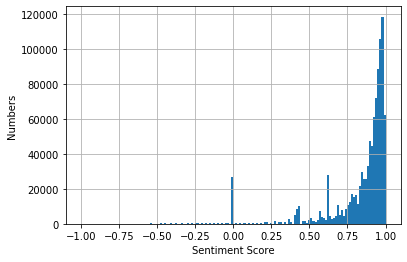

In [9]:
# plot sentiment score distribution
df_review.Score.hist(bins=150)
plt.xlabel('Sentiment Score')
plt.ylabel('Numbers')
plt.show()

Most of the review are positive, but there are indeed some netural/negative reviews. Let's zoom in the negative part

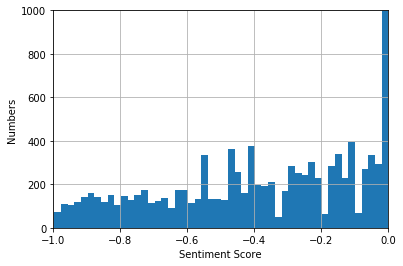

In [10]:
df_review.Score.hist(bins=100)
plt.xlim(-1,0)
plt.ylim(0,1000)
plt.xlabel('Sentiment Score')
plt.ylabel('Numbers')
plt.show()

In [11]:
# now create a dataframe df_merge that merge the sentiment scores and the review scores 
aa = df_review.groupby('listing_id').Score.mean()
aa.to_frame()
df_listing_long = pd.read_csv('listings_long.csv')
df_review_scores_rating = df_listing_long.loc[:,('id','review_scores_rating')]
df_merge = pd.merge(aa,df_review_scores_rating,left_on='listing_id',right_on='id') 

C:\Softwares\Anaconda_install\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
df_merge.head()

,Score,id,review_scores_rating
0,0.876780,2595,95.0
1,0.839448,3831,90.0
2,0.850550,5022,93.0
3,0.813390,5099,89.0
4,0.889402,5121,90.0


In [15]:
# now load the listings.csv, we need the to merge the score from df_merge with some location information, such as neighbourhood-group, latitude, longitude
df_listing_short = pd.read_csv('listings.csv')
df_listing_short.drop(['name','host_id','host_name','last_review','neighbourhood','minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365','room_type', 'price'],axis=1,inplace=True)

In [17]:
df_listing_short.head()

,id,neighbourhood_group,latitude,longitude
0,2595,Manhattan,40.75362,-73.98377
1,3647,Manhattan,40.80902,-73.94190
2,3831,Brooklyn,40.68514,-73.95976
3,5022,Manhattan,40.79851,-73.94399
4,5099,Manhattan,40.74767,-73.97500


In [18]:
# Now merge the score with location information
df_listing_SentimentScore_ReviewScoreRating = pd.merge(df_merge,df_listing_short,left_on='id',right_on='id')
df_listing_SentimentScore_ReviewScoreRating.dropna(inplace=True)

In [19]:
df_listing_SentimentScore_ReviewScoreRating.head()

,Score,id,review_scores_rating,neighbourhood_group,latitude,longitude
0,0.876780,2595,95.0,Manhattan,40.75362,-73.98377
1,0.839448,3831,90.0,Brooklyn,40.68514,-73.95976
2,0.850550,5022,93.0,Manhattan,40.79851,-73.94399
3,0.813390,5099,89.0,Manhattan,40.74767,-73.97500
4,0.889402,5121,90.0,Brooklyn,40.68688,-73.95596


In [20]:
#first check the correlation between sentiment scores and review scores
Corr = df_listing_SentimentScore_ReviewScoreRating[['Score','review_scores_rating']].corr()
print(Corr)

                         Score  review_scores_rating
Score                 1.000000              0.469023
review_scores_rating  0.469023              1.000000


Correlation facotr=0.46, no bad

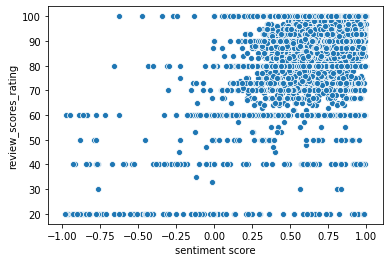

In [23]:
# plot sentimental score vs review score in a scatter plot
sns.scatterplot(x='Score',y='review_scores_rating',data=df_listing_SentimentScore_ReviewScoreRating)
plt.xlabel('sentiment score')
plt.show()

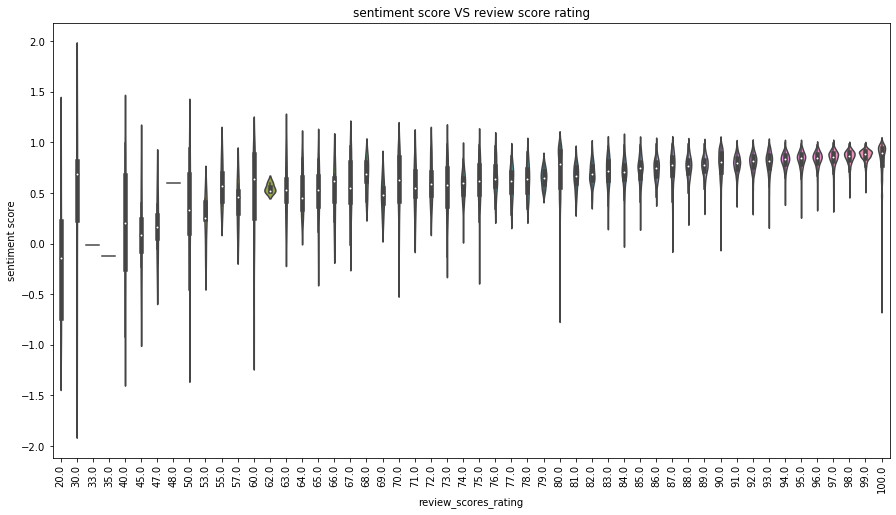

In [25]:
# now plot a violin plot between this two scores
plt.figure(figsize=(15,8))
sns.violinplot(x="review_scores_rating", y="Score",
               data=df_listing_SentimentScore_ReviewScoreRating)
plt.xlabel('review_scores_rating')
plt.ylabel('sentiment score')
plt.xticks(rotation=90)
plt.title('sentiment score VS review score rating')
plt.show()


looks like high review scores and high sentiment scores are more consistent, for low review scores, sentiment score can be scatter around, cannot detect very well

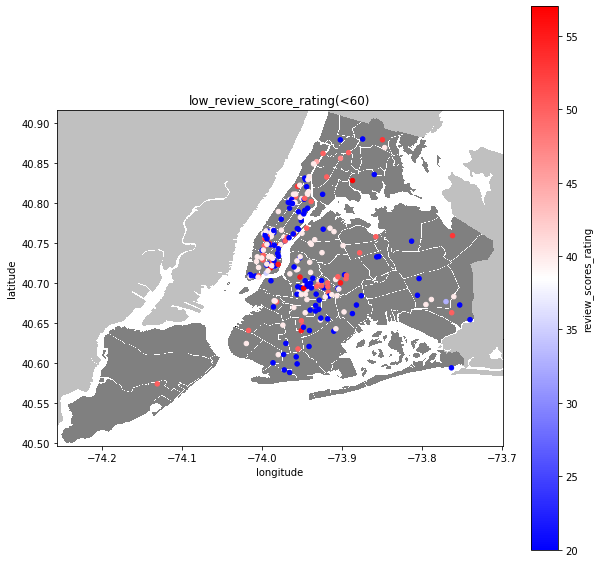

In [21]:
# now we want to see where are the low review scores are at, we set the threshold to show the scores lower than 60
import urllib
plt.figure(figsize=(10,10))
i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
NYC_image = plt.imread(i)
plt.imshow(NYC_image,extent=[-74.257159, -73.699215, 40.495992,40.915568])
ax = plt.gca()
df_listing_SentimentScore_ReviewScoreRating[df_listing_SentimentScore_ReviewScoreRating.review_scores_rating<60].plot(kind='scatter',x='longitude', y='latitude',c='review_scores_rating',cmap='bwr',ax=ax)
plt.title('low_review_score_rating(<60)')
plt.show()

Seem no clear pattens, low review scores can happen anywhere, we need to consider the ratio between low scores to the total

In [22]:
# reviews scores rating <60, sum
a = df_listing_SentimentScore_ReviewScoreRating[df_listing_SentimentScore_ReviewScoreRating.review_scores_rating<60][['review_scores_rating','neighbourhood_group']].groupby('neighbourhood_group').sum()
b = df_listing_SentimentScore_ReviewScoreRating[['review_scores_rating','neighbourhood_group']].groupby('neighbourhood_group').sum()
low_score_rate = a/b
low_score_rate.columns = ['low review_rating(<60)_rate']
low_score_rate

,low review_rating(<60)_rate
neighbourhood_group,
Bronx,0.004651
Brooklyn,0.001818
Manhattan,0.002889
Queens,0.002524
Staten Island,0.001653


Bronnx has much higher lower review_score rate than other neighbourhood

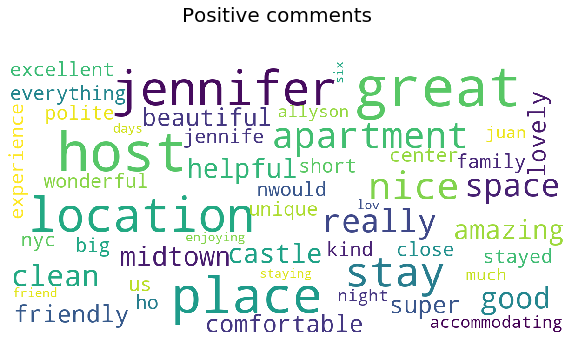

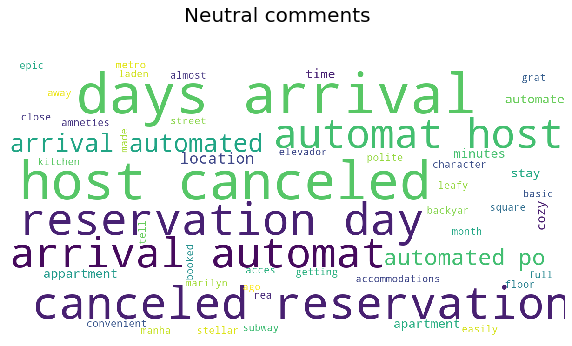

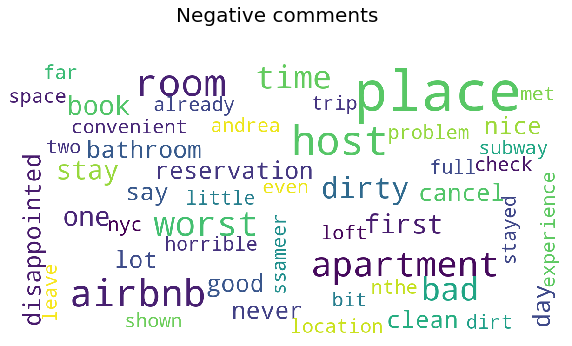

In [28]:
# plot the word cloud figure
from wordcloud import WordCloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 50,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 1.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df_review[df_review.Score>0.3].comments_clean,'Positive comments')
show_wordcloud(df_review[df_review.Score==0].comments_clean,'Neutral comments')
show_wordcloud(df_review[df_review.Score<-0.3].comments_clean,'Negative comments')